# Decision Tree

In [1]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import roc_auc_score
import pandas as pd
from joblib import dump
import matplotlib.pyplot as plt
import numpy as np

In [2]:
import sys
sys.path.append('F:\\Users\\Manuel García Plaza\\Desktop\\TFG\\')

In [3]:
from notebooks.utils.classification_metrics import classification

In [4]:
train =  pd.read_parquet('../../../data/model_input/train_sets/software_defect.parquet')
validation =  pd.read_parquet('../../../data/model_input/validation_sets/software_defect.parquet')

In [5]:
y_train = train.defects
X_train = train.drop(columns=['defects'])

In [6]:
y_validation = validation.defects
X_validation = validation.drop(columns=['defects'])

In [11]:
exploratory_depths = [1, 5, 10, 15, 20, 25, 30, 40, 50, 60]

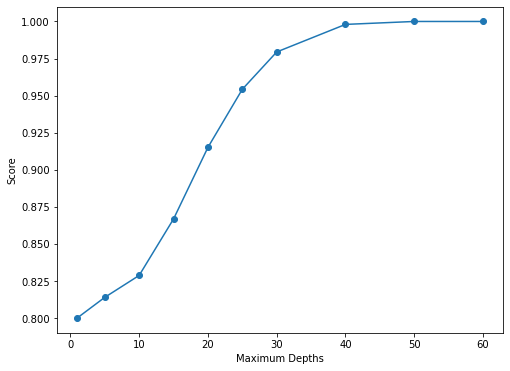

In [12]:
plt.figure(figsize=(8, 6))
plt.plot(exploratory_depths, [DecisionTreeClassifier(max_depth=i).fit(X_train, y_train).score(X_train, y_train) for i in exploratory_depths], marker= 'o')
plt.xlabel('Maximum Depths')
plt.ylabel('Score')
plt.show()

We are going to fit trees ranging maximum depth from 1 to 50

In [13]:
max_depth = [1, 3, 5, 7, 10, 12, 15, 17, 20, 22, 25, 27, 30, 35, 40, 45, 50]

In [14]:
models_list = [DecisionTreeClassifier(max_depth = i) for i in max_depth]
names_list = ['DT_'+str(i) for i in max_depth]

In [15]:
metrics = classification(models_list, names_list, '../../../data/metrics/software_defect/decision_tree.csv', X_train, y_train, X_validation, y_validation)
metrics

,Run_Time,Train_AUC,Validation_AUC,delta%
DT_1,0.151006,0.703995,0.705096,0.156285
DT_3,0.431248,0.778690,0.780205,0.194584
DT_5,0.428444,0.788015,0.786786,-0.155916
DT_7,0.604895,0.794442,0.785358,-1.143424
DT_10,0.810753,0.812614,0.764072,-5.973607
DT_12,0.986687,0.832994,0.745947,-10.449888
DT_15,1.157247,0.872333,0.708141,-18.822143
DT_17,1.274377,0.900069,0.669137,-25.657210
DT_20,1.534122,0.937168,0.620837,-33.753898
DT_22,1.704941,0.956598,0.596775,-37.614832


The highest AUC in validation is achieved when the maximum depth is 5, and the delta is actually acceptable. Then, **DT_5** is the selected model.

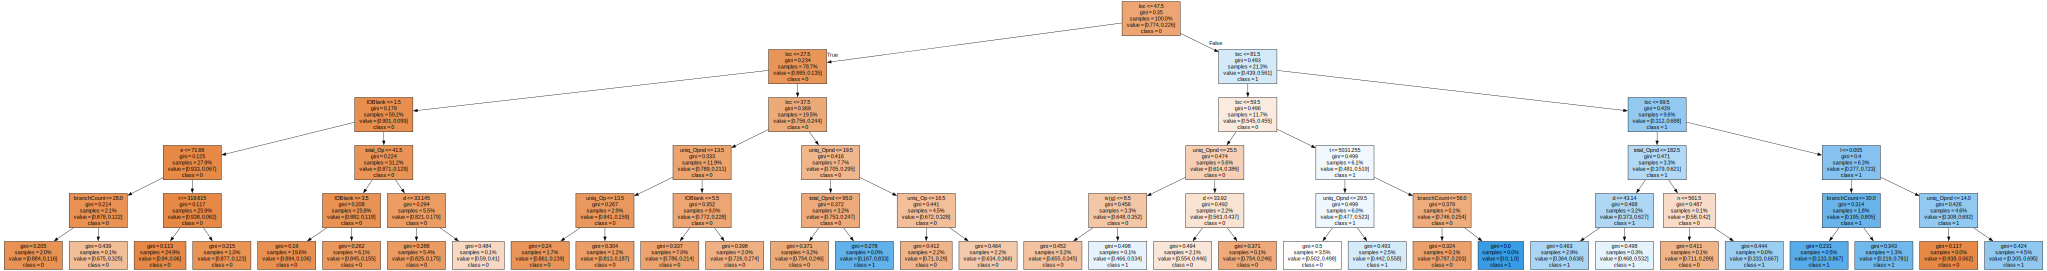

In [17]:
from sklearn.tree import export_graphviz
import graphviz


tree5 = export_graphviz(models_list[2], out_file=None, 
                                feature_names=X_train.columns,
                                filled=True, proportion=True, class_names=['0', '1'])

graph5 = graphviz.Source(tree5, format="png")
graph5

Let's retrain the model

In [18]:
test =  pd.read_parquet('../../../data/model_input/test_sets/software_defect.parquet')

In [19]:
y_test = test.defects
X_test = test.drop(columns=['defects'])

In [20]:
retrain = pd.concat([train, validation])

In [21]:
y_retrain = retrain.defects
X_retrain = retrain.drop(columns=['defects'])

In [22]:
model = DecisionTreeClassifier(max_depth=5).fit(X_retrain, y_retrain)

In [23]:
test_pred = model.predict_proba(X_test)[:, 1]
auc = roc_auc_score(y_test, test_pred)
print('Test AUC:', round(auc, 4))

Test AUC: 0.7856


We got a similar performance than before. 

Let's plot again the tree (and save it as pdf):

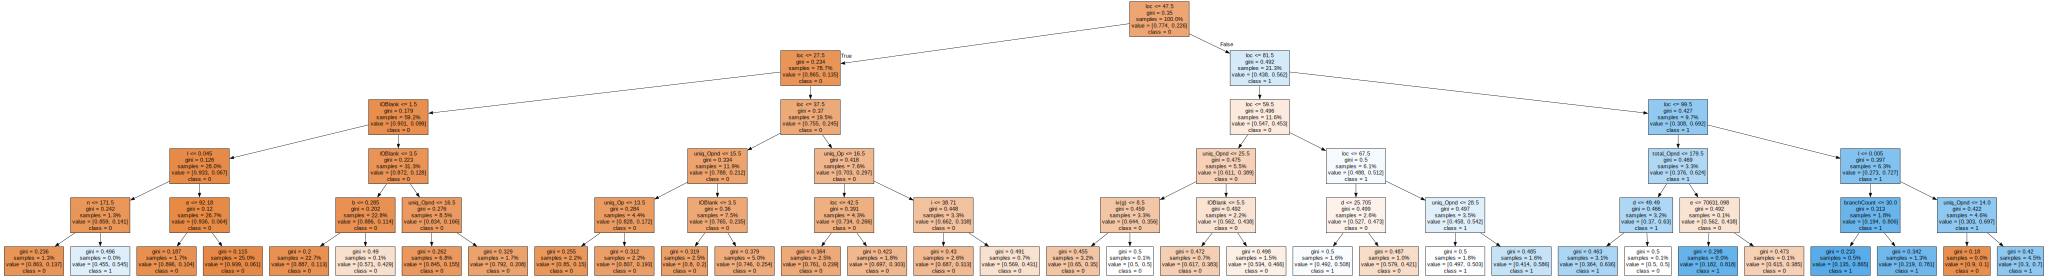

In [24]:
finaltree = export_graphviz(model, out_file=None, 
                                feature_names=X_retrain.columns,
                                filled=True, proportion=True, class_names=['0', '1'])

finalgraph = graphviz.Source(finaltree, format="pdf")
finalgraph.render(filename='best_decision_tree')
finalgraph

In [25]:
dump(model, 'best_decision_tree.joblib')

['best_decision_tree.joblib']

In [26]:
with open('../../../data/metrics/software_defect/final_AUC.txt', 'a') as f:
    f.write('\nDT, '+ str(auc))